# **Week 1: Introduction to Data Wrangling and Visualisation in R**
```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```


This week, we will dive into data wrangling and data visualisation in R using the `dplyr` and `ggplot2` packages. If you are not familiar with basic R data types and operations, please take some time to review [Week 0](https://colab.research.google.com/github/edelweiss611428/MXB107-Notebooks/blob/main/notebooks/Week_0.ipynb) content.

## **Pre-Configurating the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Importing Required Datasets and Packages**
**Run the following lines of code**:

In [1]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/edelweiss611428/MXB107-Notebooks.git")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: stringr

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: IRdisplay

Loading required package: png

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘png’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: grid



**Do not modify the following**:

In [2]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr") %in% loadedNamespaces()))

})

test_that("Test if all utility functions have been loaded", {
  expect_true(exists("skewness"))
  expect_true(exists("kurtosis"))
})

Loading required package: testthat


Attaching package: ‘testthat’


The following objects are masked from ‘package:magrittr’:

    equals, is_less_than, not


The following object is masked from ‘package:tidyr’:

    matches


The following object is masked from ‘package:dplyr’:

    matches




Test passed 🥳
Test passed 🥇


## **Workshop Questions**


### **EPA Fuel Economy Dataset**

A dataset containing information on over 13,500 cars sold in the US from 2010 to 2020, including measurements and characteristics related to vehicle fuel economy and specifications. Data sourced from the [US Fuel Economy website](https://www.fueleconomy.gov/feg/download.shtml).

| Variable | Description                                    |
|----------|------------------------------------------------|
| `city`   | EPA measured fuel economy in miles per gallon (city driving) |
| `hwy`    | EPA measured fuel economy in miles per gallon (highway driving) |
| `cyl`    | Number of cylinders in the engine              |
| `disp`   | Engine displacement (litres)                    |
| `drive`  | Vehicle drivetrain layout (e.g., FWD, RWD, AWD) |
| `make`   | Vehicle manufacturer name                       |
| `model`  | Vehicle model name                              |
| `trans`  | Transmission type (manual or automatic)        |
| `year`   | Vehicle model year                              |


In [3]:
epa_data = read.csv("./datasets/epa_data.csv")
str(epa_data)

'data.frame':	13569 obs. of  9 variables:
 $ city : int  16 15 16 19 19 19 19 19 19 19 ...
 $ hwy  : int  24 22 22 27 29 24 26 27 29 24 ...
 $ cyl  : int  8 8 8 4 4 4 4 4 4 4 ...
 $ disp : num  5 5 5 2 2 2.4 2.4 2 2 2.4 ...
 $ drive: chr  "Rear-Wheel Drive" "Rear-Wheel Drive" "Rear-Wheel Drive" "Rear-Wheel Drive" ...
 $ make : chr  "Jaguar" "Jaguar" "Jaguar" "Pontiac" ...
 $ model: chr  "XK" "XK" "XK Convertible" "Solstice" ...
 $ trans: chr  "Automatic" "Automatic" "Automatic" "Automatic" ...
 $ year : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...


### **Question 1**

Suppose you want to compare the fuel economy in city driving between manual and automatic transmissions using the EPA dataset.
- What type of graphical summary would best display this comparison?
- Use `ggplot` to produce this visualisation.

**Hint**:
- Only specify the x-axis inside `ggplot(aes())`.
- Use `geom_histogram(aes(y = after_stat(density)))` to plot normalised histograms for comparison (y-axis is defined here).
- Use `facet_wrap()` to create small multiples.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


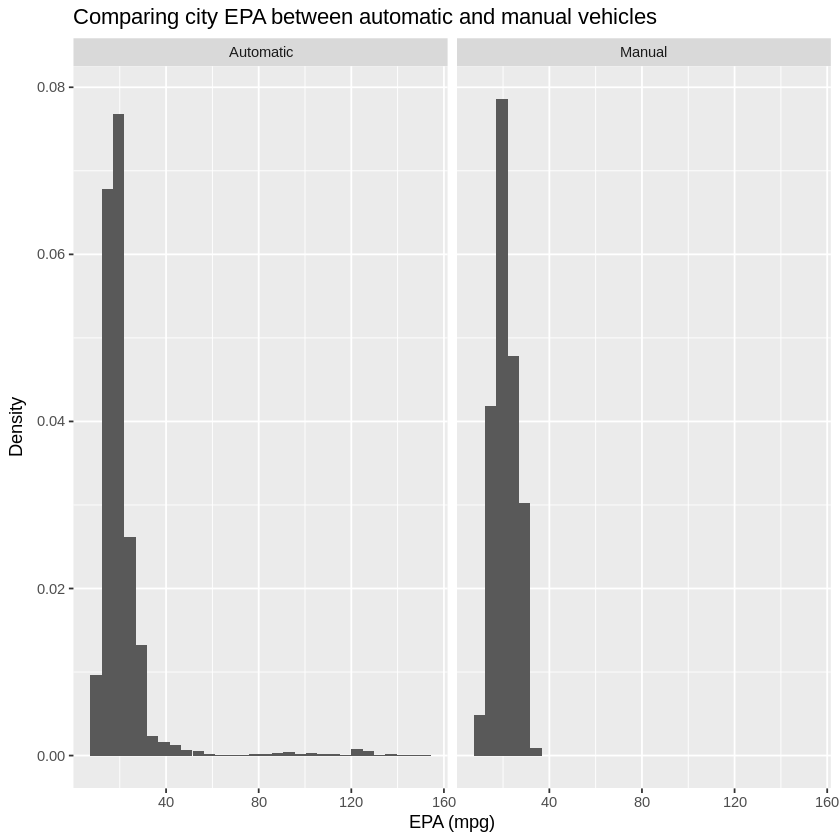

In [4]:
epa_data %>%
  ggplot(aes(x = city)) +
    geom_histogram(aes(y = after_stat(density)))+
    facet_wrap(~trans) +
    labs(
      title = "Comparing City EPA by Transmission Type",
      x = "EPA (mpg)",
      y = "Density"
    )

### **Question 2**

Suppose you want to compare the fuel economy between manual and automatic transmissions for both city and highway driving using the EPA dataset.

- What steps would you take to prepare the data?
- What type of graphical summary would best display this comparison?
- Use `ggplot` to produce this visualisation.

**Hint**: We need a new `long-format` data frame.



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


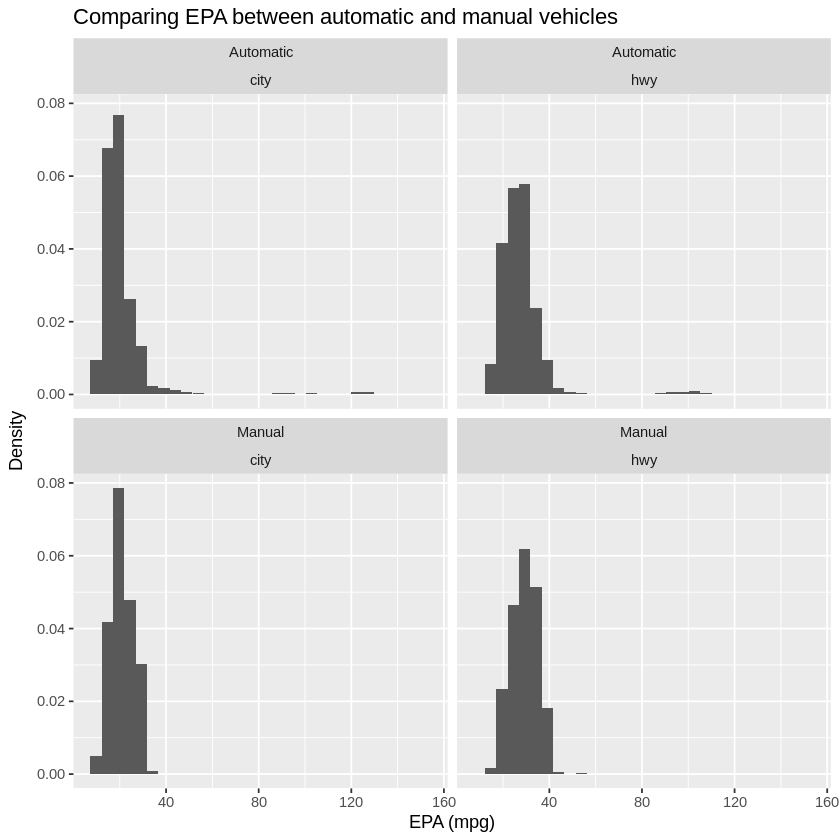

In [5]:
epa_data %>%
  pivot_longer(
    cols = c(city, hwy),
    names_to = "type",
    values_to = "value"
  ) %>%
    ggplot(aes(x = value)) +
    geom_histogram(aes(y = after_stat(density)))+
    facet_wrap(~ trans + type)+
    labs(
      title = "Comparing City and Highway EPA by Transmission Type",
      x = "EPA (mpg)",
      y = "Density"
    )

### **Question 3**

Suppose that you want to explore how engine displacement changed over time.

- What type of graph or chart would you use and why?
- Use `ggplot` to produce this graphical summary.

**Hint**:
- Use `stat_summary(func = "mean", geom = "line")` instead of `geom_line`.
- A simpler approach is to use `group_by() %>% summarise()`. Use `na.rm = TRUE` option in `mean()`.

Warning message:
“Removed 215 rows containing non-finite outside the scale range
(`stat_summary()`).”


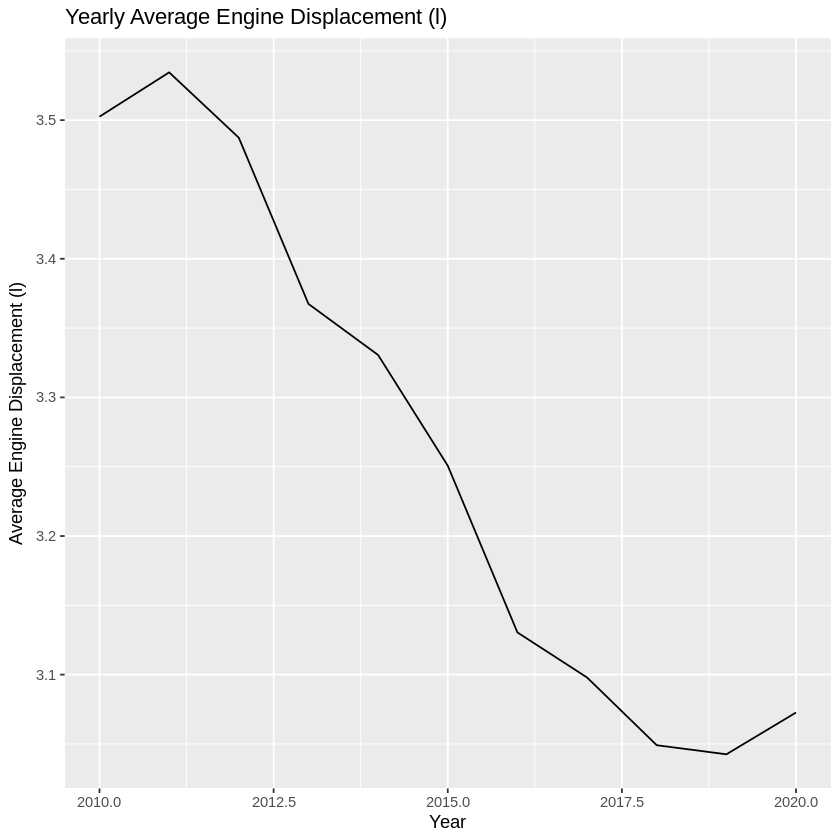

In [6]:
#Solution 1
epa_data %>%
  ggplot(aes(x = year, y = disp))+
  stat_summary(fun = "mean", geom="line")+
  labs(
    title = "Yearly Average Engine Displacement (l)",
    y = "Average Engine Displacement (l)",
    x = "Year"
  )

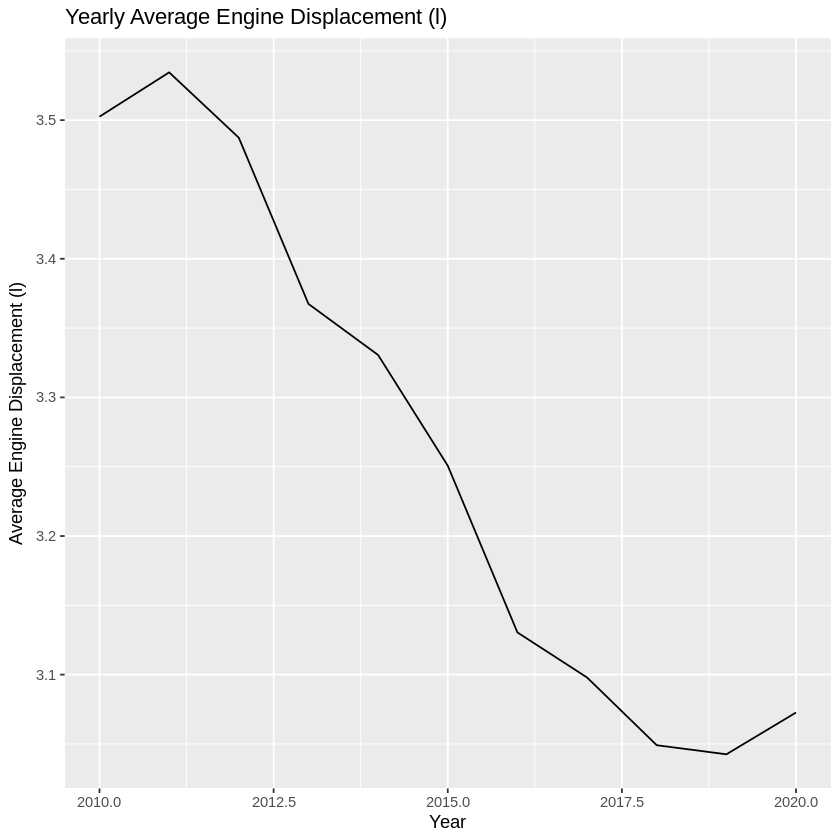

In [7]:
#Solution 2
epa_data %>%
  group_by(year) %>%
  summarise(mean = mean(disp, na.rm = T)) %>%
  ggplot(aes(x = year, y = mean)) +
  geom_line() +
  labs(
    title = "Yearly Average Engine Displacement (l)",
    y = "Average Engine Displacement (l)",
    x = "Year"
  )

### **Question 4**

Suppose you want to identify which manufacturers produced the most fuel-efficient cars given city driving EPA in the `epa_data` dataset.

- Use `group_by() %>% summarise()` to summarise `EPA` by manufacturer. Name the summary column `mean_mpg`.

In [8]:
epa_data%>%group_by(make)%>%
  summarise(mean_mpg = mean(city),
            .group = "drop") -> make_data

- Use `ggplot` to create a Pareto plot (i.e., a sorted bar chart) to support your analysis? Is the plot descriptive enough?

**Hint**:  Use `ggplot(aes(x = reorder(make,-mean_mpg)))` to make sure `make` is the x-asis but sorted by `-mean_mpg` (e.g., larger values come first).

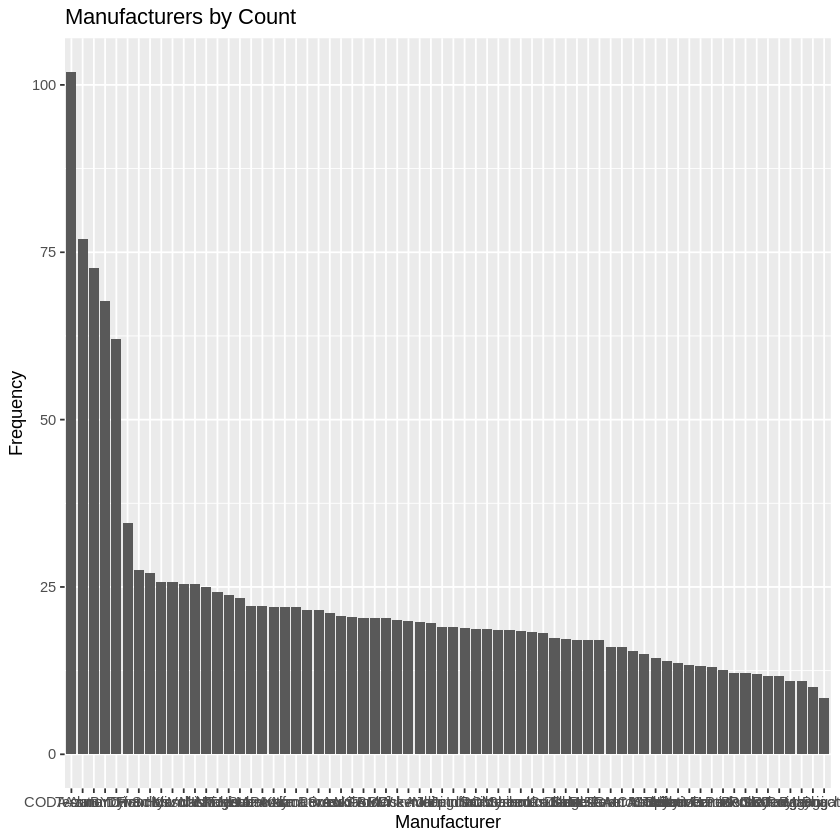

In [9]:
make_data %>%
  ggplot(aes(x = reorder(make,-mean_mpg)))+
  geom_bar(aes(y = mean_mpg),stat = "identity")+
  labs(
    title = "Manufacturers by Count",
    y = "Frequency",
    x = "Manufacturer"
  )

- How might you improve the previous plot to better answer the question?

**Hint**: Use `slice_max(order_by = mean_mpg, n)` to select top `n` manufacturers based on `-mean_mpg`.

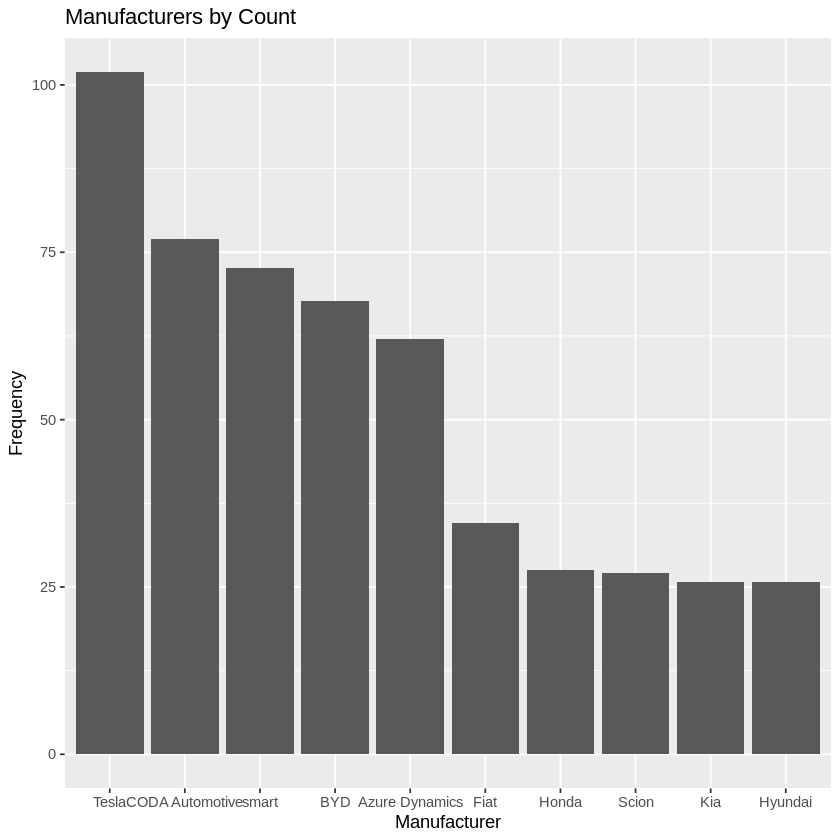

In [10]:
epa_data%>%group_by(make)%>%
  summarise(mean_mpg = mean(city), .group = "drop") %>%
  slice_max(order_by = mean_mpg, n = 10) %>%
  ggplot(aes(x = reorder(make,-mean_mpg)))+
  geom_bar(aes(y = mean_mpg),stat = "identity")+
  labs(
    title = "Manufacturers by Count",
    y = "Frequency",
    x = "Manufacturer"
  )